# Project 1: Cyclists in Stuttgart

## Biking instead of driving: how good is the good will of Stuttgarters?

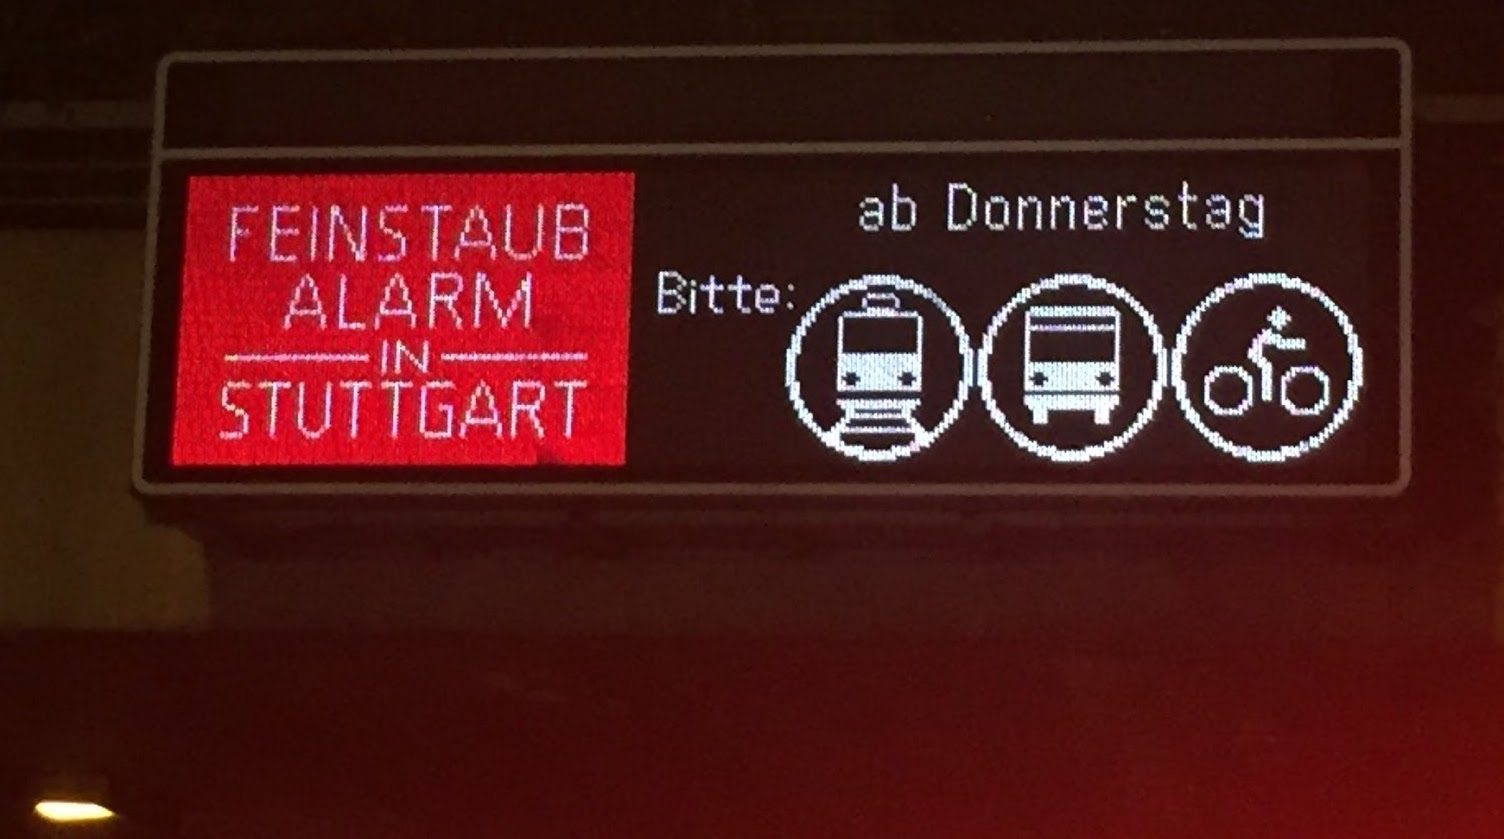

In [22]:
from IPython.display import Image
Image("Feinstaubalarm.png")

Stuttgart is the dirtiest city in Germany. In case of particulate matter measurements, the city with a population of 600,000 inhabitants regularly hits the official limits introduced by the European Union. The reason: Stuttgart’s special topography with its elevation and valleys surrounded by forests and vineyards. Due to its location in a basin, certain weather conditions can lead to relatively little airflow in the inner city, producing conditions conducive to the build-up of air pollutants such as fine dust or nitrogen oxide. 

After years of discussion in the local council, the city administration introduced a so-called "fine-dust alarm" in 2016. On days with a high load, the city calls publicly on the radio and in newspapers on its citizens to take the bicycle or public transport instead of cars. This is especially tricky because Stuttgart is the city of Mercedes (over 19,000 employees) and Porsche (14,000), therefore particulate matter measurement is very controversial. So far, the action that is taken by the administration relies upon the good will of Stuttgart's citizens. 

The alarm was triggered when the German Meteorological Service (DWD) forecasts particular limitations in atmospheric airflow on at least two consecutive days between 15th of October 2016 and 15th of April 2017.
During that time period, this was the case 13 times over a total of 85 days.

My question: Do citizens voluntarily change their behavior? I developed two approaches: Firstly, I plan to use data that comes from two bicycle counting stations in the center of the city to check whether there was a rise in cyclists during the alerts. This data is not published by the city, but was provided to me by an OpenSource network. Secondly, I would like to take a look at the ticket sales of Stuttgart's public transport. The figures could provide information about whether during the alerts actually more people switched from their cars to bus and subway than usually.

## First dataset, measuring station for cyclists at Böblinger Strasse

### 1) Question: Did the number of cyclists rise on the days with particulate matter-alert?                                  
### 2) Question: Or was it just the weather? :)

In [23]:
import pandas as pd
import re

In [24]:
Böblinger_Strasse = [["01\/01\/2017","51.0"],["01\/02\/2017","138.0"],["01\/03\/2017","131.0"],["01\/04\/2017","132.0"],["01\/05\/2017","119.0"],["01\/06\/2017","60.0"],["01\/07\/2017","79.0"],["01\/08\/2017","39.0"],["01\/09\/2017","203.0"],["01\/10\/2017","201.0"],["01\/11\/2017","241.0"],["01\/12\/2017","290.0"],["01\/13\/2017","254.0"],["01\/14\/2017","101.0"],["01\/15\/2017","71.0"],["01\/16\/2017","171.0"],["01\/17\/2017","202.0"],["01\/18\/2017","213.0"],["01\/19\/2017","206.0"],["01\/20\/2017","193.0"],["01\/21\/2017","73.0"],["01\/22\/2017","82.0"],["01\/23\/2017","232.0"],["01\/24\/2017","206.0"],["01\/25\/2017","197.0"],["01\/26\/2017","218.0"],["01\/27\/2017","215.0"],["01\/28\/2017","157.0"],["01\/29\/2017","165.0"],["01\/30\/2017","250.0"],["01\/31\/2017","262.0"],["02\/01\/2017","364.0"],["02\/02\/2017","476.0"],["02\/03\/2017","406.0"],["02\/04\/2017","216.0"],["02\/05\/2017","193.0"],["02\/06\/2017","503.0"],["02\/07\/2017","486.0"],["02\/08\/2017","463.0"],["02\/09\/2017","426.0"],["02\/10\/2017","353.0"],["02\/11\/2017","274.0"],["02\/12\/2017","292.0"],["02\/13\/2017","491.0"],["02\/14\/2017","524.0"],["02\/15\/2017","573.0"],["02\/16\/2017","603.0"],["02\/17\/2017","298.0"],["02\/18\/2017","304.0"],["02\/19\/2017","325.0"],["02\/20\/2017","527.0"],["02\/21\/2017","339.0"],["02\/22\/2017","490.0"],["02\/23\/2017","632.0"],["02\/24\/2017","364.0"],["02\/25\/2017","373.0"],["02\/26\/2017","275.0"],["02\/27\/2017","673.0"],["02\/28\/2017","325.0"],["03\/01\/2017","374.0"],["03\/02\/2017","534.0"],["03\/03\/2017","491.0"],["03\/04\/2017","468.0"],["03\/05\/2017","268.0"],["03\/06\/2017","521.0"],["03\/07\/2017","361.0"],["03\/08\/2017","423.0"],["03\/09\/2017","335.0"],["03\/10\/2017","718.0"],["03\/11\/2017","583.0"],["03\/12\/2017","654.0"],["03\/13\/2017","892.0"],["03\/14\/2017","921.0"],["03\/15\/2017","931.0"],["03\/16\/2017","1054.0"],["03\/17\/2017","772.0"],["03\/18\/2017","103.0"],["03\/19\/2017","406.0"],["03\/20\/2017","853.0"],["03\/21\/2017","640.0"],["03\/22\/2017","517.0"],["03\/23\/2017","916.0"],["03\/24\/2017","833.0"],["03\/25\/2017","641.0"],["03\/26\/2017","769.0"],["03\/27\/2017","1080.0"],["03\/28\/2017","1115.0"],["03\/29\/2017","1266.0"],["03\/30\/2017","1249.0"],["03\/31\/2017","1219.0"],["04\/01\/2017","840.0"],["04\/02\/2017","675.0"],["04\/03\/2017","1059.0"],["04\/04\/2017","1091.0"],["04\/05\/2017","1146.0"],["04\/06\/2017","905.0"],["04\/07\/2017","993.0"],["04\/08\/2017","726.0"],["04\/09\/2017","974.0"],["04\/10\/2017","1095.0"],["04\/11\/2017","923.0"],["04\/12\/2017","1022.0"],["04\/13\/2017","762.0"],["04\/14\/2017","452.0"],["04\/15\/2017","314.0"],["04\/16\/2017","146.0"],["04\/17\/2017","93.0"],["04\/18\/2017","300.0"],["04\/19\/2017","318.0"],["04\/20\/2017","567.0"],["04\/21\/2017","744.0"],["04\/22\/2017","331.0"],["04\/23\/2017","523.0"],["04\/24\/2017","1128.0"],["04\/25\/2017","618.0"],["04\/26\/2017","344.0"],["04\/27\/2017","378.0"],["04\/28\/2017","584.0"],["04\/29\/2017","530.0"],["04\/30\/2017","885.0"],["05\/01\/2017","105.0"],["05\/02\/2017","609.0"],["05\/03\/2017","566.0"],["05\/04\/2017","741.0"],["05\/05\/2017","945.0"],["05\/06\/2017","781.0"],["05\/07\/2017","176.0"],["05\/08\/2017","443.0"],["05\/09\/2017","821.0"],["05\/10\/2017","1333.0"],["05\/11\/2017","1052.0"],["05\/12\/2017","813.0"],["05\/13\/2017","582.0"],["05\/14\/2017","444.0"],["05\/15\/2017","1130.0"],["05\/16\/2017","1618.0"],["05\/17\/2017","1642.0"],["05\/18\/2017","1094.0"],["05\/19\/2017","546.0"],["05\/20\/2017","625.0"],["05\/21\/2017","1285.0"],["05\/22\/2017","1399.0"],["05\/23\/2017","1437.0"],["05\/24\/2017","1279.0"],["05\/25\/2017","952.0"],["05\/26\/2017","1171.0"],["05\/27\/2017","778.0"],["05\/28\/2017","839.0"],["05\/29\/2017","1401.0"],["05\/30\/2017","1148.0"],["05\/31\/2017","1407.0"],["06\/01\/2017","1416.0"],["06\/02\/2017","1109.0"],["06\/03\/2017","620.0"],["06\/04\/2017","492.0"],["06\/05\/2017","419.0"],["06\/06\/2017","792.0"],["06\/07\/2017","743.0"],["06\/08\/2017","1149.0"],["06\/09\/2017","792.0"]]

In [25]:
df_B = pd.DataFrame(Böblinger_Strasse)
df_B.head()

,0,1
0,01\/01\/2017,51.0
1,01\/02\/2017,138.0
2,01\/03\/2017,131.0
3,01\/04\/2017,132.0
4,01\/05\/2017,119.0


In [26]:
df_B = df_B.rename(columns={0: 'date', 1: 'cyclists'})
df_B.head()

,date,cyclists
0,01\/01\/2017,51.0
1,01\/02\/2017,138.0
2,01\/03\/2017,131.0
3,01\/04\/2017,132.0
4,01\/05\/2017,119.0


In [27]:
df_B.cyclists = df_B.cyclists.str.extract('([^\.]+)')
df_B.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,date,cyclists
0,01\/01\/2017,51
1,01\/02\/2017,138
2,01\/03\/2017,131
3,01\/04\/2017,132
4,01\/05\/2017,119


In [32]:
df_B.columns

Index(['date', 'cyclists'], dtype='object')

In [33]:
df_B['cyclists'].describe()

count     160.000000
mean      598.668750
std       385.039142
min        39.000000
25%       286.250000
50%       523.500000
75%       861.000000
max      1642.000000
Name: cyclists, dtype: float64

In [70]:
#df_B.reset_index(level=['date', 'cyclists'])

In [18]:
import numpy as np

In [30]:
df_B['cyclists'] = pd.DataFrame(np.asarray(df_B['cyclists'], dtype=np.float))

In [71]:
df_B.head()

,date,cyclists
0,01\/01\/2017,51.0
1,01\/02\/2017,138.0
2,01\/03\/2017,131.0
3,01\/04\/2017,132.0
4,01\/05\/2017,119.0


## Second dataset, measuring station for cyclists at König-Karls-Brücke

In [10]:
König_Karls_Brücke = [["01\/01\/2017","214"],["01\/02\/2017","555"],["01\/03\/2017","641"],["01\/04\/2017","561"],["01\/05\/2017","606"],["01\/06\/2017","275"],["01\/07\/2017","306"],["01\/08\/2017","203"],["01\/09\/2017","748"],["01\/10\/2017","824"],["01\/11\/2017","955"],["01\/12\/2017","1071"],["01\/13\/2017","882"],["01\/14\/2017","453"],["01\/15\/2017","305"],["01\/16\/2017","777"],["01\/17\/2017","871"],["01\/18\/2017","877"],["01\/19\/2017","873"],["01\/20\/2017","844"],["01\/21\/2017","426"],["01\/22\/2017","358"],["01\/23\/2017","918"],["01\/24\/2017","858"],["01\/25\/2017","803"],["01\/26\/2017","949"],["01\/27\/2017","924"],["01\/28\/2017","584"],["01\/29\/2017","584"],["01\/30\/2017","923"],["01\/31\/2017","958"],["02\/01\/2017","1464"],["02\/02\/2017","1699"],["02\/03\/2017","1457"],["02\/04\/2017","840"],["02\/05\/2017","778"],["02\/06\/2017","1714"],["02\/07\/2017","1687"],["02\/08\/2017","1704"],["02\/09\/2017","1506"],["02\/10\/2017","1306"],["02\/11\/2017","991"],["02\/12\/2017","1064"],["02\/13\/2017","1643"],["02\/14\/2017","1862"],["02\/15\/2017","2057"],["02\/16\/2017","2168"],["02\/17\/2017","1245"],["02\/18\/2017","940"],["02\/19\/2017","1181"],["02\/20\/2017","1878"],["02\/21\/2017","1337"],["02\/22\/2017","1832"],["02\/23\/2017","2264"],["02\/24\/2017","1492"],["02\/25\/2017","1335"],["02\/26\/2017","1209"],["02\/27\/2017","2556"],["02\/28\/2017","1293"],["03\/01\/2017","1351"],["03\/02\/2017","1791"],["03\/03\/2017","2109"],["03\/04\/2017","1944"],["03\/05\/2017","1266"],["03\/06\/2017","1819"],["03\/07\/2017","1430"],["03\/08\/2017","1606"],["03\/09\/2017","1196"],["03\/10\/2017","2460"],["03\/11\/2017","1905"],["03\/12\/2017","2694"],["03\/13\/2017","2794"],["03\/14\/2017","2870"],["03\/15\/2017","2766"],["03\/16\/2017","3409"],["03\/17\/2017","2529"],["03\/18\/2017","395"],["03\/19\/2017","1220"],["03\/20\/2017","2718"],["03\/21\/2017","2155"],["03\/22\/2017","1639"],["03\/23\/2017","3070"],["03\/24\/2017","2493"],["03\/25\/2017","2478"],["03\/26\/2017","2888"],["03\/27\/2017","3380"],["03\/28\/2017","3698"],["03\/29\/2017","3659"],["03\/30\/2017","3991"],["03\/31\/2017","3974"],["04\/01\/2017","2651"],["04\/02\/2017","2660"],["04\/03\/2017","3502"],["04\/04\/2017","3466"],["04\/05\/2017","3485"],["04\/06\/2017","2942"],["04\/07\/2017","3192"],["04\/08\/2017","2922"],["04\/09\/2017","4639"],["04\/10\/2017","3807"],["04\/11\/2017","3329"],["04\/12\/2017","3459"],["04\/13\/2017","2504"],["04\/14\/2017","1616"],["04\/15\/2017","1123"],["04\/16\/2017","728"],["04\/17\/2017","514"],["04\/18\/2017","1229"],["04\/19\/2017","1274"],["04\/20\/2017","1972"],["04\/21\/2017","2654"],["04\/22\/2017","871"],["04\/23\/2017","1935"],["04\/24\/2017","3762"],["04\/25\/2017","1966"],["04\/26\/2017","1164"],["04\/27\/2017","1386"],["04\/28\/2017","1841"],["04\/29\/2017","1457"],["04\/30\/2017","4076"],["05\/01\/2017","390"],["05\/02\/2017","1949"],["05\/03\/2017","1990"],["05\/04\/2017","2437"],["05\/05\/2017","3452"],["05\/06\/2017","2789"],["05\/07\/2017","709"],["05\/08\/2017","1234"],["05\/09\/2017","2709"],["05\/10\/2017","4597"],["05\/11\/2017","3243"],["05\/12\/2017","2444"],["05\/13\/2017","1715"],["05\/14\/2017","1837"],["05\/15\/2017","3535"],["05\/16\/2017","5243"],["05\/17\/2017","5504"],["05\/18\/2017","3839"],["05\/19\/2017","1790"],["05\/20\/2017","2206"],["05\/21\/2017","5695"],["05\/22\/2017","4318"],["05\/23\/2017","4693"],["05\/24\/2017","4357"],["05\/25\/2017","4578"],["05\/26\/2017","3977"],["05\/27\/2017","3183"],["05\/28\/2017","3505"],["05\/29\/2017","4247"],["05\/30\/2017","3644"],["05\/31\/2017","4243"],["06\/01\/2017","4515"],["06\/02\/2017","3681"],["06\/03\/2017","2272"],["06\/04\/2017","1796"],["06\/05\/2017","1686"],["06\/06\/2017","2563"],["06\/07\/2017","2536"],["06\/08\/2017","3973"],["06\/09\/2017","2627"]]

In [11]:
df_K = pd.DataFrame(König_Karls_Brücke)

In [72]:
df_K.head()

,date,cyclists
0,01\/01\/2017,214
1,01\/02\/2017,555
2,01\/03\/2017,641
3,01\/04\/2017,561
4,01\/05\/2017,606


In [73]:
df_K = df_K.rename(columns={0: 'date', 1: 'cyclists'})
df_K.head()

,date,cyclists
0,01\/01\/2017,214
1,01\/02\/2017,555
2,01\/03\/2017,641
3,01\/04\/2017,561
4,01\/05\/2017,606


In [17]:
df_K.cyclists = df_K.cyclists.str.extract('([^\.]+)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [74]:
df_K.head()

,date,cyclists
0,01\/01\/2017,214
1,01\/02\/2017,555
2,01\/03\/2017,641
3,01\/04\/2017,561
4,01\/05\/2017,606


In [75]:
df_B.head()

,date,cyclists
0,01\/01\/2017,51.0
1,01\/02\/2017,138.0
2,01\/03\/2017,131.0
3,01\/04\/2017,132.0
4,01\/05\/2017,119.0


## Joining the two cycling datasets 

In [76]:
joined_cyclists = df_B.merge(df_K, on='date')

In [77]:
joined_cyclists.head(10)

,date,cyclists_x,cyclists_y
0,01\/01\/2017,51.0,214
1,01\/02\/2017,138.0,555
2,01\/03\/2017,131.0,641
3,01\/04\/2017,132.0,561
4,01\/05\/2017,119.0,606
5,01\/06\/2017,60.0,275
6,01\/07\/2017,79.0,306
7,01\/08\/2017,39.0,203
8,01\/09\/2017,203.0,748
9,01\/10\/2017,201.0,824


In [78]:
joined_cyclists.dtypes

date           object
cyclists_x    float64
cyclists_y     object
dtype: object

In [79]:
joined_cyclists['cyclists_x'].astype(int).head()

0     51
1    138
2    131
3    132
4    119
Name: cyclists_x, dtype: int64

In [80]:
joined_cyclists['cyclists_y'].astype(int).head()

0    214
1    555
2    641
3    561
4    606
Name: cyclists_y, dtype: int64

In [81]:
joined_cyclists.dtypes

date           object
cyclists_x    float64
cyclists_y     object
dtype: object

In [82]:
joined_cyclists['total'] = joined_cyclists['cyclists_x'].astype(float) + joined_cyclists['cyclists_y'].astype(float)

In [83]:
joined_cyclists['cyclists_x'] = joined_cyclists['cyclists_x'].astype(int)

## Third dataset about alerts (selfcreated from a not readible pdf)

In [84]:
df_alerts = pd.read_excel('alert.xlsx')

In [85]:
df_alerts.head()

,date,alert,PM > 50 μg/m3
0,01\/01\/2017,0,1
1,01\/02\/2017,0,0
2,01\/03\/2017,0,0
3,01\/04\/2017,0,0
4,01\/05\/2017,0,0


In [86]:
joined_alerts = joined_cyclists.merge(df_alerts, on='date')

In [87]:
joined_alerts.dtypes

date              object
cyclists_x         int64
cyclists_y        object
total            float64
alert              int64
PM > 50 μg/m3      int64
dtype: object

In [101]:
joined_alerts.head(15)

,date,cyclists_x,cyclists_y,total,alert,PM > 50 μg/m3
0,01/01/2017,51,214,265.0,0,1
1,01/02/2017,138,555,693.0,0,0
2,01/03/2017,131,641,772.0,0,0
3,01/04/2017,132,561,693.0,0,0
4,01/05/2017,119,606,725.0,0,0
5,01/06/2017,60,275,335.0,0,0
6,01/07/2017,79,306,385.0,0,1
7,01/08/2017,39,203,242.0,0,0
8,01/09/2017,203,748,951.0,1,1
9,01/10/2017,201,824,1025.0,1,0


In [89]:
%matplotlib inline

In [90]:
joined_alerts.total.describe()

count     161.000000
mean     2721.024845
std      1675.960650
min       242.000000
25%      1356.000000
50%      2340.000000
75%      3791.000000
max      7146.000000
Name: total, dtype: float64

In [92]:
joined_alerts['date'] = joined_alerts['date'].str.replace("\\", "")

In [93]:
joined_alerts['date'].head()

0    01/01/2017
1    01/02/2017
2    01/03/2017
3    01/04/2017
4    01/05/2017
Name: date, dtype: object

In [102]:
joined_alerts['datetime'] = pd.to_datetime(joined_alerts.date, format="%m/%d/%Y")

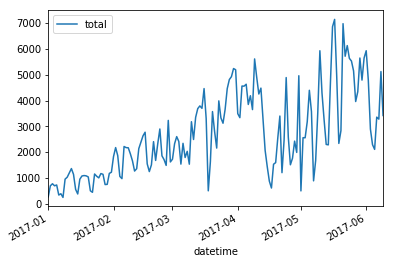

In [107]:
joined_alerts.plot(y='total', x='datetime')

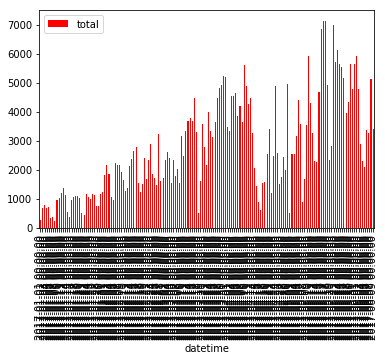

In [112]:
joined_alerts.plot(y='total', x='datetime', kind='bar', color='red')

In [120]:
alert_days = joined_alerts[joined_alerts['alert'] == 1]

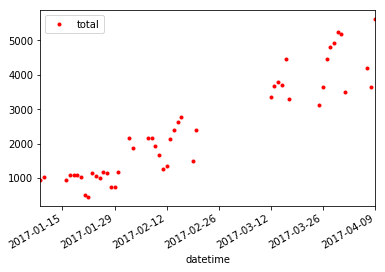

In [129]:
alert_days.plot(y='total', x='datetime', style='.', color='red')

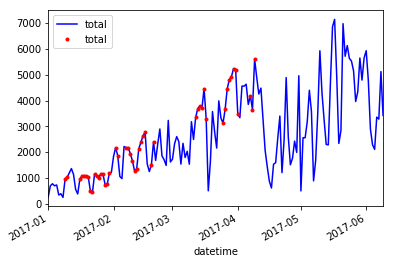

In [133]:
ax = joined_alerts.plot(y='total', x='datetime', color='blue')
alert_days.plot(y='total', x='datetime', style='.', color='red', ax=ax)

In [138]:
joined_alerts['total'].pct_change().head()

0         NaN
1    1.615094
2    0.113997
3   -0.102332
4    0.046176
Name: total, dtype: float64

In [135]:
joined_alerts['percentage'] = joined_alerts['total'].pct_change()

In [137]:
joined_alerts.head(20)

,date,cyclists_x,cyclists_y,total,alert,PM > 50 μg/m3,datetime,percentage
0,01/01/2017,51,214,265.0,0,1,2017-01-01,NaN
1,01/02/2017,138,555,693.0,0,0,2017-01-02,1.615094
2,01/03/2017,131,641,772.0,0,0,2017-01-03,0.113997
3,01/04/2017,132,561,693.0,0,0,2017-01-04,-0.102332
4,01/05/2017,119,606,725.0,0,0,2017-01-05,0.046176
5,01/06/2017,60,275,335.0,0,0,2017-01-06,-0.537931
6,01/07/2017,79,306,385.0,0,1,2017-01-07,0.149254
7,01/08/2017,39,203,242.0,0,0,2017-01-08,-0.371429
8,01/09/2017,203,748,951.0,1,1,2017-01-09,2.929752
9,01/10/2017,201,824,1025.0,1,0,2017-01-10,0.077813
